# Analyzing borrowers’ risk of defaulting

Analysis of the dependence of the presence of children, marital status and the purpose of the loan on the loan debt.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Step-1.-Open-the-data-file-and-have-a-look-at-the-general-information." data-toc-modified-id="Step-1.-Open-the-data-file-and-have-a-look-at-the-general-information.-0">Step 1. Open the data file and have a look at the general information.</a></span><ul class="toc-item"><li><span><a href="#Conclusion-step-1" data-toc-modified-id="Conclusion-step-1-0.1">Conclusion step 1</a></span></li></ul></li><li><span><a href="#Step-2.-Data-preprocessing" data-toc-modified-id="Step-2.-Data-preprocessing-1">Step 2. Data preprocessing</a></span><ul class="toc-item"><li><span><a href="#Processing-missing-values" data-toc-modified-id="Processing-missing-values-1.1">Processing missing values</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.1.1">Conclusion</a></span></li></ul></li><li><span><a href="#Data-type-replacement" data-toc-modified-id="Data-type-replacement-1.2">Data type replacement</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.2.1">Conclusion</a></span></li></ul></li><li><span><a href="#Processing-duplicates" data-toc-modified-id="Processing-duplicates-1.3">Processing duplicates</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.3.1">Conclusion</a></span></li></ul></li><li><span><a href="#Categorizing-Data" data-toc-modified-id="Categorizing-Data-1.4">Categorizing Data</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.4.1">Conclusion</a></span></li></ul></li></ul></li><li><span><a href="#Step-3.-Answer-these-questions" data-toc-modified-id="Step-3.-Answer-these-questions-2">Step 3. Answer these questions</a></span><ul class="toc-item"><li><span><a href="#Is-there-a-relation-between-having-kids-and-repaying-a-loan-on-time?" data-toc-modified-id="Is-there-a-relation-between-having-kids-and-repaying-a-loan-on-time?-2.1">Is there a relation between having kids and repaying a loan on time?</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.1.1">Conclusion</a></span></li></ul></li><li><span><a href="#Is-there-a-relation-between-marital-status-and-repaying-a-loan-on-time?" data-toc-modified-id="Is-there-a-relation-between-marital-status-and-repaying-a-loan-on-time?-2.2">Is there a relation between marital status and repaying a loan on time?</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.2.1">Conclusion</a></span></li></ul></li><li><span><a href="#Is-there-a-relation-between-income-level-and-repaying-a-loan-on-time?" data-toc-modified-id="Is-there-a-relation-between-income-level-and-repaying-a-loan-on-time?-2.3">Is there a relation between income level and repaying a loan on time?</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.3.1">Conclusion</a></span></li></ul></li><li><span><a href="#How-do-different-loan-purposes-affect-on-time-repayment-of-the-loan?" data-toc-modified-id="How-do-different-loan-purposes-affect-on-time-repayment-of-the-loan?-2.4">How do different loan purposes affect on-time repayment of the loan?</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.4.1">Conclusion</a></span></li></ul></li></ul></li><li><span><a href="#Step-4.-General-conclusion" data-toc-modified-id="Step-4.-General-conclusion-3">Step 4. General conclusion</a></span></li></ul></div>

## Step 1. Open the data file and have a look at the general information. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid", palette='Set2')

In [2]:
data = pd.read_csv('credit_scoring_eng.csv')
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,19351.000000
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,26787.568355
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,16475.450632
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,16488.504500
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,32549.611000
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000


In [3]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


### Conclusion step 1
At first look, I don't see all of the data in the days_employed and total_income columns. In column children we have value -1 and 20. It's not real. Like and 0 in column dob_years

## Step 2. Data preprocessing
### Processing missing values

In [4]:
data['days_employed'] = data['days_employed'].fillna(
    value=data['days_employed'].median())
data['total_income'] = data['total_income'].fillna(
    value=data['total_income'].median())
data['children'].loc[data['children'] == 20] = int(2)
data['children'].loc[data['children'] == -1] = int(1)
data['dob_years'].loc[(data['income_type'] == 'retiree') & (data['dob_years'] == 0)] = data['dob_years'][(
    data['income_type'] == 'retiree') & (data['dob_years'] != 0)].median()
data['dob_years'].loc[(data['dob_years'] == 0)] = data['dob_years'][(
    data['income_type'] != 'retiree') & (data['dob_years'] != 0)].median()
data = data.drop(index=data[data['gender'] ==
                            'XNA'].index).reset_index(drop=True)

#### Conclusion
I change NaN value to median in columns days_employed and total_income. I thin that value 20 and -1 in children columns it is human error. Change it to 2 an 1. I group value 0 in dob_years for group of retiree and other and I write instead of 0 median. It will be more real. Value XNA in gender i drop becouse it is only one and does not interfere with analysis.
### Data type replacement

In [5]:
data[['days_employed', 'dob_years']] = data[[
    'days_employed', 'dob_years']].astype('int64')
data.dtypes

children              int64
days_employed         int64
dob_years             int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income        float64
purpose              object
dtype: object

#### Conclusion
I change type of colums with float type to int, becouse it is more accurate.

### Processing duplicates

In [6]:
data['education'] = data['education'].str.lower()
data['education'].value_counts()

secondary education    15233
bachelor's degree       5260
some college             743
primary education        282
graduate degree            6
Name: education, dtype: int64

In [7]:
data.duplicated().sum()

71

In [8]:
data = data.drop_duplicates().reset_index(drop=True)
data.duplicated().sum()

0

In [9]:
from nltk.stem import SnowballStemmer
english_stemmer = SnowballStemmer('english')
for row in data['purpose']:
    for word in row.split(' '):
        stem_word = english_stemmer.stem(word)
        if stem_word == 'wed':
            data['purpose'].loc[data.purpose == row] = 'wedding'
        elif stem_word == 'estat' or stem_word == 'hous' or stem_word == 'properti':
            data['purpose'].loc[data.purpose == row] = 'estate'
        elif stem_word == 'car':
            data['purpose'].loc[data.purpose == row] = 'car'
        elif stem_word == 'educ' or stem_word == 'univers':
            data['purpose'].loc[data.purpose == row] = 'education'
data['purpose'].value_counts()

estate       10810
car           4306
education     4013
wedding       2324
Name: purpose, dtype: int64

#### Conclusion

I change case and duplicates disappear in education column. i think it is also human error. I find 71 row of fully duplicated data and drop it. I use stemmer to change purpose for 4 values.

### Categorizing Data

In [10]:
def children(data):
    if data > 0:
        return True
    else:
        return False

In [11]:
child_debt_dict = data[['children', 'debt']]
child_debt_dict['children_id'] = child_debt_dict['children'].apply(children)
marital_dict = data[['family_status', 'family_status_id', 'debt']]
income_level_dict = data[['total_income', 'debt']]
purposes_dict = data[['purpose', 'debt']]
child_debt_dict

,children,debt,children_id
0,1,0,True
1,1,0,True
2,0,0,False
3,3,0,True
4,0,0,False
...,...,...,...
21448,1,0,True
21449,0,0,False
21450,1,1,True
21451,3,1,True


#### Conclusion

I make 4 tables for each questions. For children i make new column wiht boolen value if have child or not.

## Step 3. Answer these questions
### Is there a relation between having kids and repaying a loan on time?

In [12]:
debt_child = child_debt_dict['children_id'][(child_debt_dict['children_id']) & (child_debt_dict['debt'] == 1)].count(
) / child_debt_dict['children_id'][(child_debt_dict['children_id']) & child_debt_dict['debt'] == 0].count() * 100

# divide count of people with children and debt by count of people with children and without debt
# get the ratio of people with children with debt and without.

In [13]:
debt_wchild = child_debt_dict['children_id'][(child_debt_dict['children_id'] == False) & (child_debt_dict['debt'] == 1)].count(
) / child_debt_dict['children_id'][(child_debt_dict['children_id'] == False) & child_debt_dict['debt'] == 0].count() * 100
# divide count of people without children and with debt by count of people without children and without debt
# get the ratio of people without children with debt and without.
debt_wchild - debt_child

1.9498019663493285

#### Conclusion
1.95% higher chance of loan default if you have a child.

### Is there a relation between marital status and repaying a loan on time?

In [118]:
fig = marital_dict.loc[marital_dict['debt'] == 1].groupby('family_status')['debt'].count(
) / marital_dict.loc[marital_dict['debt'] == 0].groupby('family_status')['debt'].count()
fig = fig.reset_index()
fig.columns = ['family_status', 'relation']

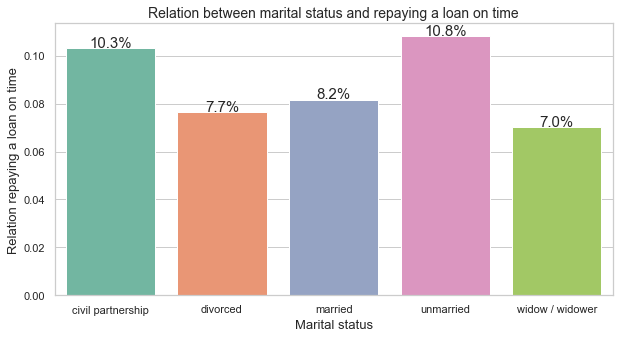

In [119]:
plt.figure(figsize=(10, 5))
splot = sns.barplot(y='relation', x='family_status', data=fig)
plt.xlabel('Marital status', size=13)
plt.ylabel('Relation repaying a loan on time', size=13)
plt.title('Relation between marital status and repaying a loan on time', size=14)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1%'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, 5), 
                   textcoords = 'offset points')

#### Conclusion
Unmarried people more often do not give loans than other. Relationships increase responsibility.

### Is there a relation between income level and repaying a loan on time?

In [61]:
median = income_level_dict['total_income'].median()
count_less = income_level_dict.loc[(
    income_level_dict['total_income'] < median)]
count_more = income_level_dict.loc[(
    income_level_dict['total_income'] > median)]
count_less['debt'].loc[data['debt'] == 1].count(
) / count_less['debt'].loc[data['debt'] == 0].count() * 100

9.0632397700372

In [62]:
count_more['debt'].loc[data['debt'] == 1].count(
) / count_more['debt'].loc[data['debt'] == 0].count() * 100

8.61120467048389

#### Conclusion

I make two group of people with more and less than mean income and looking relation between repaying a loan on time ore not. Less 1% people with incom less mean incom do not give loans back  in time than people with incom more.

### How do different loan purposes affect on-time repayment of the loan?

In [114]:
fig = purposes_dict.loc[purposes_dict['debt'] == 1].groupby('purpose')['debt'].count(
) / purposes_dict.loc[purposes_dict['debt'] == 0].groupby('purpose')['debt'].count()
fig = fig.reset_index()

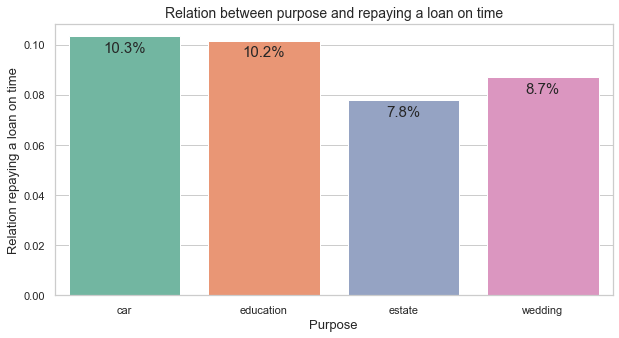

In [115]:
plt.figure(figsize=(10, 5))
splot = sns.barplot(y='debt', x='purpose', data=fig)
plt.xlabel('Purpose', size=13)
plt.ylabel('Relation repaying a loan on time', size=13)
plt.title('Relation between purpose and repaying a loan on time', size=14)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1%'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

#### Conclusion
People with loan for estate better give back in time loan than people with loan for car.

## Step 4. General conclusion

I analyzed the impact of children, income level, marital status, and purposes on loan failure on time. the most profitable group is widow / widower without children with hight incom which take loan for estate. Need to pay more attention to the group witch take loan for car and unmarried. 